- Found outliers: ['25.2 at 2/6/2019', '24.0 at 1/2/2019']
- Design Spec: LSL=5, USL=25
- Fixed CL: LCL=9.97, UCL=19.93, Mean=14.95
- CPK=1.18, StDev=2.72, Sample_Mean=15.41


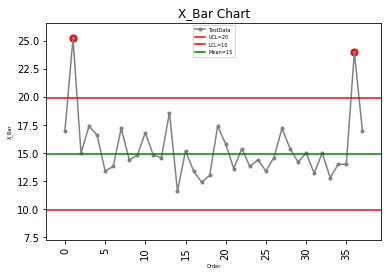

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import statistics
import time
from pptx import Presentation
import datetime as dt
from pptx.util import Inches
from spec import Xbar_UCL
from spec import Xbar_LCL
from spec import Xbar_Mean
from spec import R_Mean
from spec import R_UCL
from spec import R_LCL
from spec import USL
from spec import LSL
from spec import SIZE
from pptx.util import Pt
from pptx.enum.text import MSO_AUTO_SIZE
from scipy import stats  # for normality test
import scipy.stats as stats  # for normality test
from scipy.stats import sem  # Standard Error for Mean
from scipy.stats import sem, ttest_ind   # for t-test
#############################################################################################

df=pd.read_csv("SPCdata_m.csv")
y=[]
x=[]
r=[]
date=[]
for n in range((len(df['TestData']))//SIZE):
    y.append(df['TestData'][(n*SIZE):((n+1)*SIZE)].mean())
    r.append(abs((df['TestData'][(n*SIZE):((n+1)*SIZE)].max())-(df['TestData'][n:(n+SIZE)].min())))
    x.append(n)
    date.append(df['TestDate'][n*SIZE])

# Make a new DataFrame with x,y,r,date
df_new=pd.DataFrame({'Label':x,'TestData':y,'Range':r,'Date':date})


xx=df_new['Label']
yy=df_new['TestData']
rr=df_new['Range']
date_new=df_new['Date']

# Statistics for Xbar-chart
std=round(statistics.stdev(yy),2)
mean=Xbar_Mean
upper=Xbar_UCL
lower=Xbar_LCL
avg=round(statistics.mean(yy),2)

Rstd=round(statistics.stdev(rr),2)
Ravg=round(statistics.mean(rr),2)
Rmean=R_Mean
Rupper=R_UCL
Rlower=R_LCL
if Rlower<0:
    Rlower=0

# Outlier list value collection
y2=[]
d2=[]
s=[LSL-std]*len(xx)  # For plot scarter chart's y value. Put other values in low level as [LSL-std] to not show up in chart
Ry2=[]
Rd2=[]
Rs=[-1]*len(xx) 

for i in range(len(xx)):
    if yy[i]>upper or yy[i]<lower:
        d2.append(date_new[i])
        y2.append(yy[i])
        s[i]=yy[i]
    if rr[i]>Rupper or rr[i]<Rlower:
        Rd2.append(date_new[i])
        Ry2.append(rr[i])
        Rs[i]=rr[i]
                
Cpk=round(min((USL-avg)/(3*std),(avg-LSL)/(3*std)),2)      

# Plot Initial Xbar Chart
plt.plot(xx,yy,marker='.', color='grey')

# Use scatter plot to highlight excursion points.
plt.scatter(xx, s, s=50, marker="o", facecolors='red', edgecolors="red" )

# Add Control Lines
plt.axhline(y=upper, color='r', linestyle='-', alpha=1, label=(f'UCL={round(upper)}'))
plt.axhline(y=lower, color='r', linestyle='-', alpha=1, label=(f'LCL={round(lower)}'))
plt.axhline(y=mean, color='green', linestyle='-', alpha=1, label=(f'Mean={round(mean)}'))

# Modify charts and save to png
plt.title("X_Bar Chart")
plt.xlabel("Order")
plt.ylabel("X_Bar")
plt.xticks(rotation=90)
SMALL_SIZE = 5
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
        # plt.xlim(0,10)
plt.ylim((lower-std),)
plt.legend(loc="best")

table=pd.DataFrame({'TestDate':d2,'TestResult':y2})
ExPoints=[]
for i in range(len(d2)):
    ExPoints.append(f'{y2[i]} at {d2[i]}')

plt.savefig("Xbar_Chart.png")
Conclusion=((f'- Found outliers: {ExPoints}')+'\n'+(f"- Design Spec: LSL={LSL}, USL={USL}")+"\n"+ (f"- Fixed CL: LCL={Xbar_LCL}, UCL={Xbar_UCL}, Mean={Xbar_Mean}") +"\n"+(f"- CPK={Cpk}, StDev={std}, Sample_Mean={avg}"))
print(Conclusion)

In [13]:
# Box Comments for Sampling qty

df2 = df.set_index("Shift")
night_shift=len(df2.loc[['Night'],['TestData']])
day_shift=len(df2.loc[['Day'],['TestData']])
df3 = df.set_index("Line")
a_line=len(df3.loc[['A'],['TestData']])          
b_line=len(df3.loc[['B'],['TestData']])           
box_comments=((f"LineA: {a_line}pcs, LineB: {b_line}pcs")+"\n"+(f"Day: {day_shift}pcs, Night: {night_shift}pcs"))
print(box_comments)

LineA: 95pcs, LineB: 95pcs
Day: 100pcs, Night: 90pcs


- Found outliers: ['18 at 1/2/2019']
- Design Spec: LSL=5, USL=25
- Fixed CL: LCL=0, UCL=15.74, Mean=7.27
- Sample_R_Mean=6.21


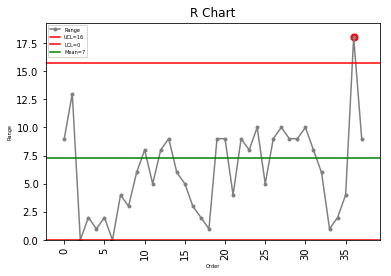

In [14]:
# Plot R Chart
plt.plot(xx,rr,marker='.', color='grey')

# Use scatter plot to highlight excursion points.
plt.scatter(xx, Rs, s=50, marker="o", facecolors='red', edgecolors="red" )

# Add Control Lines
plt.axhline(y=Rupper, color='r', linestyle='-', alpha=1, label=(f'UCL={round(Rupper)}'))
plt.axhline(y=Rlower, color='r', linestyle='-', alpha=1, label=(f'LCL={round(Rlower)}'))
plt.axhline(y=Rmean, color='green', linestyle='-', alpha=1, label=(f'Mean={round(Rmean)}'))

# Modify charts and save to png
plt.title("R Chart")
plt.xlabel("Order")
plt.ylabel("Range")
plt.xticks(rotation=90)
SMALL_SIZE = 5
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
        # plt.xlim(0,10)
plt.ylim(0,)
plt.legend(loc="best")

Rtable=pd.DataFrame({'TestDate':Rd2,'TestResult':Ry2})
RExPoints=[]
for i in range(len(Rd2)):
    RExPoints.append(f'{Ry2[i]} at {Rd2[i]}')

plt.savefig("R_Chart.png")
RConclusion=((f'- Found outliers: {RExPoints}')+'\n'+(f"- Design Spec: LSL={LSL}, USL={USL}")+"\n"+ (f"- Fixed CL: LCL={R_LCL}, UCL={R_UCL}, Mean={R_Mean}") +"\n"+(f"- Sample_R_Mean={Ravg}"))
print(RConclusion)

In [15]:
sample_status=(f"Sample Size (N): {len(df['TestData'])}                                                                                 Group Size (n): {SIZE}                                                                               Plot Size (x): {len(yy)}")
print(sample_status)     

Sample Size (N): 190                                                                                 Group Size (n): 5                                                                               Plot Size (x): 38


p-value = NormaltestResult(statistic=29.419288608934195, pvalue=4.0896170975499544e-07)


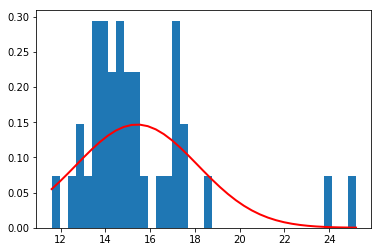

In [16]:
# Normality test/plot
mu, sigma = avg, std    # mean and standard deviation
s = yy
count, bins, ignored = plt.hist(s, len(s), density=True)
# Plot normal distribution
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
p_value=stats.normaltest(yy)
plt.savefig("normal.png")
print(f'p-value = {p_value}')

    #alpha=0.05
    #print("p = {:g}".format(p))
    #if p<alpha:
        #print(f'P-value = {p_value}, samples are NOT under normal distribution!')
    #else:
        #print(f'P-value = {p_value}, samples are under normal distribution!')

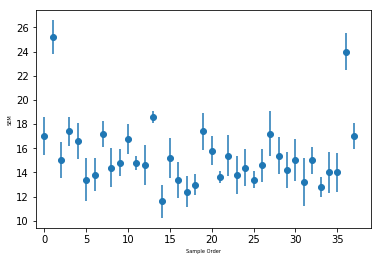

In [17]:
# Error Bar
samples=[]
num=len(df['TestData'])//SIZE
for n in range(num):
    group=[]
    for i in range(SIZE):
        group.append(df['TestData'][n*SIZE+i])
    samples.append(group)
means=[np.mean(s) for s in samples]
standard_errors=[sem(s) for s in samples]

fig, ax = plt.subplots( )
ax.errorbar(xx, means, standard_errors, fmt='o', alpha=1, label='Mean of Group Samples')    # Here the label is for the mean dot in the bar, 'alpha' is for color not statistcal index
ax.set_xlim(-1, len(samples)+1)
ax.set_xlabel("Sample Order")
ax.set_ylabel("SEM")
plt.savefig("sem.png")

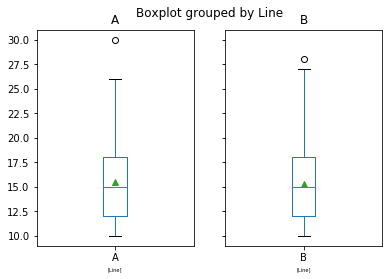

In [18]:
box=df.groupby("Line")
box.boxplot(by='Line', grid=False, showmeans=True)
plt.savefig("box.png")

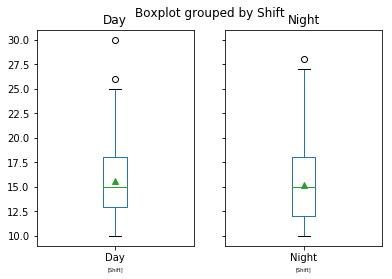

In [19]:
box2=df.groupby("Shift")
box2.boxplot(by='Shift', grid=False, showmeans=True)
plt.savefig("box2.png")

In [26]:
# Anova for Line comparision
ll=df['Line'].unique()
ano=[]
for i in range(len(ll)):
    ano.append(df.loc[df['Line']==ll[i]]['TestData'])

# limitted for 2 lines comparison 
Line_Anova=stats.f_oneway(ano[0],ano[1])
LineAno=((f'ANOVA Result for Line Comparison:')+'\n'+(f'{Line_Anova}'))
print(LineAno)


ANOVA Result for Line Comparison:
F_onewayResult(statistic=0.21710370720747357, pvalue=0.6417950409030415)


In [10]:
# Anova for Shift comparision
sl=df['Shift'].unique()
ano=[]
for i in range(len(sl)):
    ano.append(df.loc[df['Shift']==sl[i]]['TestData'])

# limitted for 2 Shifts comparison 
Shift_Anova=stats.f_oneway(ano[0],ano[1])
ShiftAno=((f'ANOVA Result for Shift Comparison:')+'\n'+(f'{Shift_Anova}'))
print(ShiftAno)

ANOVA Result for Shift Comparison:
F_onewayResult(statistic=0.7055471522441602, pvalue=0.40199295135836155)


In [11]:
# Title Slide
prs = Presentation("temp.pptx")     #change layout/placeholder template setting from temp.pptx>view>slide master 
title_slide_layout = prs.slide_layouts[0]
slide = prs.slides.add_slide(title_slide_layout)
title = slide.shapes.title
subtitle = slide.placeholders[1]
title.text = "SPC(Xbar-R-Chart) Monitoring Report"
subtitle.text = f'THIS IS MACHINE GENERATED REPORT                                                                {dt.datetime.today().strftime("%m/%d/%Y")}'


#################################################################

# Content Slide-1

bullet_slide_layout = prs.slide_layouts[5]
slide = prs.slides.add_slide(bullet_slide_layout)
shapes = slide.shapes
title_shape = shapes.title
body_shape = shapes.placeholders[1]
title_shape.text = 'Sample SEM & Normality Test'

# Body text
tf = body_shape.text_frame
tf.text = ((f'{sample_status}')+'\n') 

p = tf.add_paragraph()
p.text = ((f"Normality test result: ")+'\n'+'\n'+(f'{p_value}'))
p.level = 1

    #p = tf.add_paragraph()
    #p.text = 'optinal words here'
    #p.level = 2


# call .png
img_path_n = "normal.png"
left = Inches(0.3)
top = Inches  (0.5)
height = Inches(3.8)
pic = slide.shapes.add_picture(img_path_n, left, top, height)
img_path_sem = "sem.png"
left = Inches(0.3)
top = Inches  (3)
height = Inches(3.8)
pic = slide.shapes.add_picture(img_path_sem, left, top, height)

#####################################################################################

# Content Slide2
bullet_slide_layout = prs.slide_layouts[5]
slide = prs.slides.add_slide(bullet_slide_layout)
shapes = slide.shapes
title_shape = shapes.title
body_shape = shapes.placeholders[1]
title_shape.text = 'ANOVA for Line & Shift'

# Body text
tf = body_shape.text_frame
tf.text = ((f'{box_comments}')+'\n')  

p = tf.add_paragraph()
p.text = ((f'{LineAno}')+'\n'+'\n')
p.level = 1

p = tf.add_paragraph()
p.text = ((f'{ShiftAno}'))
p.level = 1

# call .png
img_path_xbar = "box.png"
left = Inches(0.3)
top = Inches  (0.5)
height = Inches(3.8)
pic = slide.shapes.add_picture(img_path_xbar, left, top, height)
img_path_r = "box2.png"
left = Inches(0.3)
top = Inches  (3)
height = Inches(3.8)
pic = slide.shapes.add_picture(img_path_r, left, top, height)

#####################################################################################

# Content Slide3
bullet_slide_layout = prs.slide_layouts[5]
slide = prs.slides.add_slide(bullet_slide_layout)
shapes = slide.shapes
title_shape = shapes.title
body_shape = shapes.placeholders[1]
title_shape.text = 'Xbar-R Chart Monitoring'

# Body text
if len(yy)<30:
    status=(f'WARNING: Sample size does not meet minimum requirement! Increase samples size immediately!')
elif Cpk<1.33:
    status=(f'WARNING: OCAP Required IMMEDIATELY for low CPK level ({Cpk})!') 
    if len(y2)!=0:
        Status=(f'WARNING: OCAP Required IMMEDIATELY for low CPK level ({Cpk}) and {len(y2)} Outliers!') 
elif len(y2)!=0:
    status=(f'WARNING: OCAP Required for {len(y2)} Outliers!') 
else:
    status=(f'Congratulations! The Process is Stable!')

tf = body_shape.text_frame
tf.text = ((f'{status}')+'\n')   

p = tf.add_paragraph()
p.text = ((f"Xbar Chart:")+'\n'+(f'{Conclusion}')+'\n'+'\n')
p.level = 1

    #p = tf.add_paragraph()
    #p.text = 'optinal words here'
    #p.level = 2

p = tf.add_paragraph()
p.text = ((f"R Chart:")+'\n'+(f'{RConclusion}'))
p.level = 1

    #p = tf.add_paragraph()
    #p.text = 'Funding Project List'
    #p.level = 2

    #p = tf.add_paragraph()
    #p.text = 'Funding Priority'
    #p.level=2

# call .png
img_path_xbar = "Xbar_Chart.png"
left = Inches(0.3)
top = Inches  (0.5)
height = Inches(3.8)
pic = slide.shapes.add_picture(img_path_xbar, left, top, height)
img_path_r = "R_Chart.png"
left = Inches(0.3)
top = Inches  (3)
height = Inches(3.8)
pic = slide.shapes.add_picture(img_path_r, left, top, height)

################################################################################## Use another layouts

    #bullet_slide_layout = prs.slide_layouts[7]
    #slide = prs.slides.add_slide(bullet_slide_layout)
    #shapes = slide.shapes
    #title_shape = shapes.title
    #body_shape = shapes.placeholders[0]
    #title_shape.text = 'Box Plot by Line & Shift'

    ######################## call .png
    #img_path_box = "box.png"
    #left = Inches(0.2)
    #top = Inches  (1.5)
    #height = Inches(5)
    #pic = slide.shapes.add_picture(img_path_box, left, top, height)
    #img_path_box = "box2.png"
    #left = Inches(5)
    #top = Inches  (1.5)
    #height = Inches(5)
    #pic = slide.shapes.add_picture(img_path_box, left, top, height)
#######################################################################################################

prs.save("XbarR_Chart_Control.pptx")